In [ ]:
#data from world data bank
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

C:\Users\hte12\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_csv('./lbfr.csv')

In [10]:
print(df.dtypes)
df.head()

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
Length: 68, dtype: object


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,71.281279,71.399515,71.390723,71.403524,71.272474,71.2295,70.372333,70.725768,71.068909,NaN
2,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,48.268000,48.358000,48.449000,48.541000,46.738000,44.9390,42.609000,42.224000,38.500000,NaN
3,Africa Western and Central,AFW,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,63.197665,63.009807,62.994075,62.648957,62.557066,62.4803,61.818929,61.944888,62.431328,NaN
4,Angola,AGO,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.122000,76.881000,76.640000,76.397000,76.153000,75.9080,76.009000,77.327000,76.156000,NaN


In [13]:
df_melted = pd.melt(df, id_vars=['Indicator Name','Country Name', 'Country Code', 'Indicator Code'], var_name='Year', value_name='Value')
df_melted.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Value
0,"Labor force participation rate, total (% of to...",Aruba,ABW,SL.TLF.ACTI.ZS,1960,NaN
1,"Labor force participation rate, total (% of to...",Africa Eastern and Southern,AFE,SL.TLF.ACTI.ZS,1960,NaN
2,"Labor force participation rate, total (% of to...",Afghanistan,AFG,SL.TLF.ACTI.ZS,1960,NaN
3,"Labor force participation rate, total (% of to...",Africa Western and Central,AFW,SL.TLF.ACTI.ZS,1960,NaN
4,"Labor force participation rate, total (% of to...",Angola,AGO,SL.TLF.ACTI.ZS,1960,NaN


In [ ]:
df_melted['Indicator Name'].value_counts()

Indicator Name
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)    17024
Name: count, dtype: int64

In [53]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", 
    "Iran, Islamic Rep.", "Maldives", 
    "Nepal", "Pakistan", "Sri Lanka"
]
filtered_df = df_melted[df_melted["Country Name"].isin(south_asian_countries)]
filtered_df = filtered_df.dropna()
filtered_df["Year"] = filtered_df["Year"].astype(int)

In [54]:
filtered_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Value
8248,"Labor force participation rate, total (% of to...",Afghanistan,AFG,SL.TLF.ACTI.ZS,1991,48.039
8266,"Labor force participation rate, total (% of to...",Bangladesh,BGD,SL.TLF.ACTI.ZS,1991,59.089
8278,"Labor force participation rate, total (% of to...",Bhutan,BTN,SL.TLF.ACTI.ZS,1991,72.248
8355,"Labor force participation rate, total (% of to...",India,IND,SL.TLF.ACTI.ZS,1991,55.896
8358,"Labor force participation rate, total (% of to...","Iran, Islamic Rep.",IRN,SL.TLF.ACTI.ZS,1991,46.841


In [55]:
filtered_df.dtypes

Indicator Name     object
Country Name       object
Country Code       object
Indicator Code     object
Year                int32
Value             float64
dtype: object

In [56]:
filtered_df["Country Name"].value_counts()

Country Name
Afghanistan           32
Bangladesh            32
Bhutan                32
India                 32
Iran, Islamic Rep.    32
Sri Lanka             32
Maldives              32
Nepal                 32
Pakistan              32
Name: count, dtype: int64

In [57]:
# choose a timespan where all countries are included for each
ordered = filtered_df.groupby("Year").count().sort_values(by="Year", ascending=False)
ordered.head(40)

,Indicator Name,Country Name,Country Code,Indicator Code,Value
Year,,,,,
2022,9,9,9,9,9
2021,9,9,9,9,9
2020,9,9,9,9,9
2019,9,9,9,9,9
2018,9,9,9,9,9
2017,9,9,9,9,9
2016,9,9,9,9,9
2015,9,9,9,9,9
2014,9,9,9,9,9


In [58]:
ranged_data = filtered_df[filtered_df["Year"] >= 2001]
ranged_data.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Value
10908,"Labor force participation rate, total (% of to...",Afghanistan,AFG,SL.TLF.ACTI.ZS,2001,47.840
10926,"Labor force participation rate, total (% of to...",Bangladesh,BGD,SL.TLF.ACTI.ZS,2001,59.312
10938,"Labor force participation rate, total (% of to...",Bhutan,BTN,SL.TLF.ACTI.ZS,2001,71.656
11015,"Labor force participation rate, total (% of to...",India,IND,SL.TLF.ACTI.ZS,2001,58.794
11018,"Labor force participation rate, total (% of to...","Iran, Islamic Rep.",IRN,SL.TLF.ACTI.ZS,2001,45.663


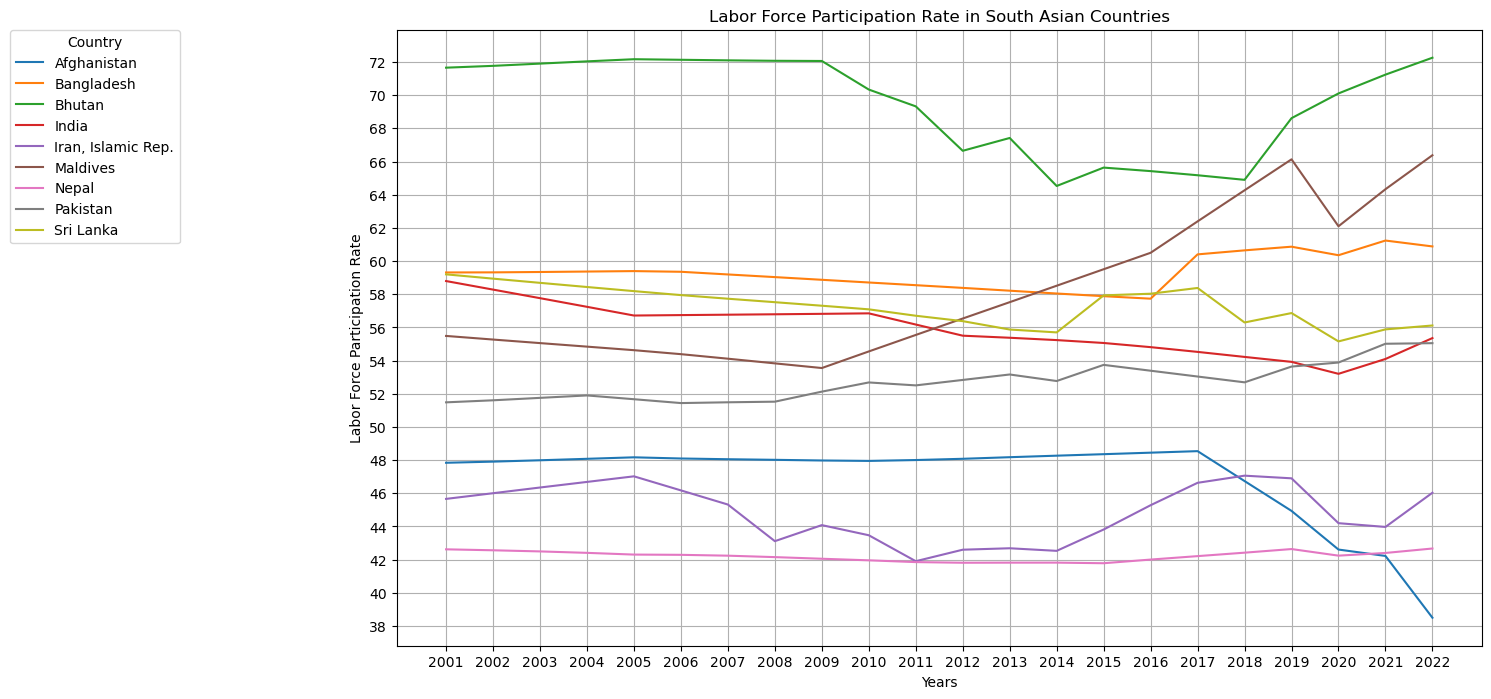

In [68]:
plt.figure(figsize=(14,8))  
plt.xlabel("Years")
plt.ylabel("Labor Force Participation Rate")
plt.title("Labor Force Participation Rate in South Asian Countries")
plt.xticks(range(ranged_data["Year"].min(), ranged_data["Year"].max()+1,1))
plt.yticks(np.arange(0, math.ceil(ranged_data["Value"].max()) + 0.5, 2))
plt.grid(True)
for country in south_asian_countries:
    country_data = ranged_data[ranged_data["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Value"],label=country)

plt.legend(title="Country", bbox_to_anchor=(-0.2, 1), loc="upper right", borderaxespad=0)


In [ ]:
#average lbfr in each country(2001-2022)
ranged_data.pivot_table(values="Value", index="Country Name", aggfunc="mean").sort_values(by="Value", ascending=False)

,Value
Country Name,
Bhutan,69.521182
Bangladesh,59.320909
Maldives,58.155455
Sri Lanka,57.288136
India,55.919773
Pakistan,52.699182
Afghanistan,46.953409
"Iran, Islamic Rep.",44.887136
Nepal,42.217682


In [ ]:
#average lbfr per year in South Asia(2001-2022)
ranged_data.pivot_table(values="Value", index="Year", aggfunc="mean").sort_values(by="Value", ascending=False)

,Value
Year,
2019,54.946111
2022,54.804556
2001,54.672778
2002,54.628333
2003,54.592556
2017,54.587889
2004,54.555000
2021,54.488333
2005,54.473222


In [69]:
#median lbfr per year in South Asia(2001-2022)
ranged_data.pivot_table(values="Value", index="Year", aggfunc="median").sort_values(by="Value", ascending=False)

,Value
Year,
2011,55.545
2012,55.501
2001,55.486
2013,55.376
2022,55.356
2002,55.268
2014,55.235
2015,55.061
2003,55.054


In [66]:
ranged_data.pivot_table(values="Value", index="Year", columns="Country Name")

Country Name,Afghanistan,Bangladesh,Bhutan,India,"Iran, Islamic Rep.",Maldives,Nepal,Pakistan,Sri Lanka
Year,,,,,,,,,
2001,47.840,59.312,71.656,58.794,45.663,55.486,42.623,51.483,59.198
2002,47.909,59.318,71.766,58.279,46.005,55.268,42.565,51.606,58.939
2003,47.991,59.340,71.901,57.762,46.349,55.054,42.497,51.753,58.686
2004,48.079,59.367,72.037,57.241,46.686,54.841,42.410,51.899,58.435
2005,48.169,59.394,72.166,56.716,47.023,54.627,42.306,51.671,58.187
2006,48.098,59.353,72.132,56.742,46.175,54.387,42.291,51.439,57.947
2007,48.054,59.192,72.098,56.766,45.322,54.114,42.240,51.486,57.729
2008,48.018,59.032,72.071,56.791,43.115,53.832,42.153,51.523,57.520
2009,47.978,58.870,72.060,56.818,44.082,53.551,42.055,52.128,57.307
